# Setup

In [1]:
import pandas as pd

In [2]:
books_df = pd.read_csv("Books.csv")
ratings_df = pd.read_csv("Ratings.csv")
users_df = pd.read_csv("Users.csv")

c:\users\21266\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Preprocessing

### Books

In [3]:
books_df = books_df.drop(columns=["Image-URL-M", "Image-URL-S"])
books_df = books_df.rename(columns={"Book-Title": "Title", "Book-Author": "Author", "Year-Of-Publication": "Publication_year", "Image-URL-L": "img_url"})

In [4]:
books_df.dtypes

ISBN                object
Title               object
Author              object
Publication_year    object
Publisher           object
img_url             object
dtype: object

In [5]:
books_df = books_df[books_df["Publication_year"].apply(lambda x: str(x).isnumeric())]

In [6]:
books_df["Publication_year"] = books_df["Publication_year"].astype(int)

In [7]:
books_df

,ISBN,Title,Author,Publication_year,Publisher,img_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...


### Users

In [8]:
users_df = users_df.rename(columns={"User-ID": "User_id"})

In [9]:
users_df.dtypes

User_id       int64
Location     object
Age         float64
dtype: object

<AxesSubplot:>

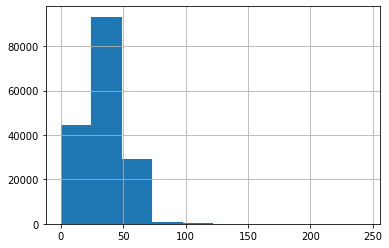

In [10]:
users_df["Age"].hist()

In [11]:
mean_age = users_df["Age"].mean()
std_age = users_df["Age"].std()
users_df["Age"] = users_df["Age"].apply(lambda x: x if abs(x - mean_age) <= 2.5 * std_age else mean_age)

<AxesSubplot:>

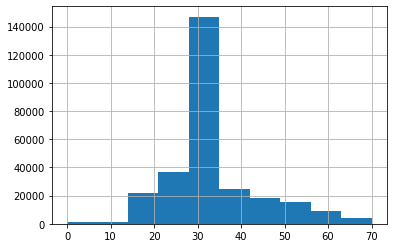

In [12]:
users_df["Age"].hist()

In [22]:
users_df

,User_id,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434
...,...,...,...
278853,278854,"portland, oregon, usa",34.751434
278854,278855,"tacoma, washington, united kingdom",50.000000
278855,278856,"brampton, ontario, canada",34.751434
278856,278857,"knoxville, tennessee, usa",34.751434


### Ratings

In [13]:
ratings_df = ratings_df.rename(columns={"User-ID": "User_id", "Book-Rating": "Book_rating"})

In [14]:
ratings_df.dtypes

User_id         int64
ISBN           object
Book_rating     int64
dtype: object

In [15]:
sorted(ratings_df["Book_rating"].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [16]:
ratings_df = ratings_df[ratings_df["ISBN"].isin(books_df["ISBN"])]

In [17]:
ratings_df

,User_id,ISBN,Book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


# Output

In [23]:
books_df.to_csv("Books_clean.csv", index=False)
users_df.to_csv("Users_clean.csv", index=False)
ratings_df.to_csv("Ratings_clean.csv", index=False)